In [1]:
# Wrangle and clean data
import pandas as pd
import numpy as mp

# Visualize Data
import seaborn as sns
import matplotlib as plt

# Model, predict, and solve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Describing Dataset
* We will use 'titanic-2nd-clean.csv' as the source data file since no column have been dropped yet.
* We will inspect the data summary of numerical and text variables.
* We will count the number of nulls and errors in each variable
* We will descibe the distribution of numerical and categorical data
* Finally, assumptions will be made in terms of correlating, completing, converting,\
 correcting, creating, classifying

In [279]:
titanic_df = pd.read_csv("titanic-2nd-clean.csv")
titanic_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SibSp_group,Parch_group
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,S,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,S,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,N,N
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,S,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,N,N


Although SibSp_group and Parch_group seem not helpful, we will not drop them at this stage. Instead, we will inspect their summary and then decide what to do with them.

In [280]:
# Numerical data summary
titanic_df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.382907,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,13.260272,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:
* Unnamed is PassengerId columns offset by -1, they are not useful in data analysis
* Every cell in Survived is populated with data, and the value is either 0 or 1. Since the mean is 0.3838, meaning that 38.38% of passengers survived from the disaster.
* Every cell in Pclass is populated with data, and the data is ordinal with 3 possible values: 1,2,3.
* Every cell in SibSp and Parch are populated with data.Both's mean values are less than 1, medians are 0, and maximums are extreme (8 for SibSp, 6 for Parch) The data is numerical discrete.
* Every cell in Age is populated with data due to the last data cleansing filled NA ages with mean ages in sex-pclass strata. The variate is continuous. Notice that the mean Age is 29.38, higher than the median 27; therefore, the fare distribution is expected to be slightly right skewed.
* Every cell in Fare is populated with data. The variate is continuous. Notice that the mean fare is 32.20, higher than the median 14.45; therefore, the fare distribution is expected to be very right skewed.

In [281]:
# Inspect the distribution of categorical variabls
titanic_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked,AgeGroup,SibSp_group,Parch_group
count,891,891,891,204,889,891,891,891
unique,891,2,681,147,3,4,3,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,Adult,N,N
freq,1,577,7,4,644,561,608,608


Analyze Data with Visual Aids

Observations:
* Name column haves no blank, no duplicates.
* Sex column has no blank, each is either male or female. In particular, males took up to 577/891 = 64.76% of passengers.
* Ticket has no blank, 681 unique values. One ticket number can occur multiple times, such as 347082 occurred for 7 times.
* Cabin has many blanks, and its values can contain duplicates.
* Embarked has 2 missing values
* AgeGroup, SibSp_group, and Parch_group have no blank. Each contain desired number of category of values.


Assumptions
Completing:
* Fill missing values of embarkation by the mode

Correcting:
* Unnamed, PassengerId, Ticket, Cabin don't contain useful information and may contain errors and blank values, so they should be dropped
* Both SibSp and Parch represents the number of acquitance and family members on board. The larger the family size may indicate more access to information, life-boat and assistance during the danger, elevating the survival rate.

Creating:
* Create a new column: family size = SibSp + Parch + 1 (self)
* Stratify Fare by 25%, 50% and 75% quantiles, rename strata by 0, 1, 2, 3. This is becuase age is not uniformly distributed over different intervals; if the space between the max and min Fare are equally divided into interval, than some intervals will contain not enough units to represent the fare group. Since only a few passengers paid fees greater than 100, we can group them with those who paid under 100 bucks but high enough.
* Extract titles from Name columns. Do passengers with more NOBLE titles have better chance to survive? Thus, we can rank titles from the most noble to the least noble, replace them with ordinal numbers.

Converting:
* Convert 'Chidren', 'Youth', 'Adult' and 'Senior' into ordinal numbers starting from 0.

Classifying:
* Women have better chance to survive to men.
* Children (Age < ?) have better chance to survive than other generations.
* Upper-class passengers are more likely to survive due to more access to news and lifeboat
* Higher fare means better survival chance
* More boble title means better survival chance
* Passengers board the ship by certain ports have better survival chance

Wrangle, cleanse and Testing Data

In [282]:
# Drop unwanted columns
titanic_df = titanic_df.drop(['Unnamed: 0', 'PassengerId', 'Cabin', 'Ticket', 'SibSp_group', 'Parch_group'],\
    axis=1)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Youth
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult


In [283]:
# Map Names to Titles
titanic_df['Title'] = titanic_df.Name.str.extract('(\w+\.)')
titanic_df.Title.head()

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Title, dtype: object

In [284]:
# Count statistics for every Title
titanic_df.groupby('Title').Title.count().sort_values(ascending = False)

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Mme.           1
Ms.            1
Capt.          1
Lady.          1
Jonkheer.      1
Don.           1
Countess.      1
Sir.           1
Name: Title, dtype: int64

Mapping Title to Nobleness to predict survival rate is impractical because noble titles like 'Capt', 'Lady', 'Sir' only have one count each, and adding them up may not enough to represent the noble group as the sample is too small. Small samples are associated with volitile proportion of survival. Hence, we should group the passengers with rare titles as 'Minority'.

Additionally, Mr., Miss., 'Mrs.', 'Ms.' only indicate maritial status. 'Mme.' is an alternative for unmarried women, 'Mlle.' similarlly, should be grouped with 'Miss.'. 'Ms.' means unclear maritial status of a women, we can guess her status by her age. All other rare titles are expected to be more noble.

In [285]:
titanic_df.Age.loc[titanic_df.Title == 'Ms.'] # She more likely to be married, so 'Mrs.'

443    28.0
Name: Age, dtype: float64

In [286]:
## Replace rare titles by minority
Minor_titles = ['Dr.', 'Rev.', 'Major.', 'Col.', 'Capt.', 'Lady.', 'Jonkheer.', 'Don.',\
    'Countess.', 'Sir.']
titanic_df.Title.replace(to_replace = Minor_titles, value = 'Minority', inplace = True)
titanic_df.Title.replace(to_replace = {'Mlle.': 'Miss.', 'Mme.': 'Miss.', 'Ms.': 'Mrs.'},\
     inplace = True)
titanic_df.groupby('Title').Title.count().sort_values(ascending = False)

Title
Mr.         517
Miss.       185
Mrs.        126
Master.      40
Minority     23
Name: Title, dtype: int64

In [287]:
titanic_df.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Minority'], dtype=object)

By Wikipedea, 'Master.' addresses little boys under age 12, 'Mr.' addresses boys over age 18. By children and women first principle, if we rank survival probability descendingly, it might be Master. > Minority > Miss. > Mrs. > Mr., encoded by ordinal numbers.

In [288]:
titanic_df['Title_rank'] = titanic_df.Title.map({'Master.': 0,  'Minority': 1, 'Miss.': 2, 'Mrs.':3, 'Mr.':4})
titanic_df['Title_rank'].head() 

0    4
1    3
2    2
3    3
4    4
Name: Title_rank, dtype: int64

In [289]:
titanic_df = titanic_df.drop('Name', axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title,Title_rank
0,0,3,male,22.0,1,0,7.2500,S,Youth,Mr.,4
1,1,1,female,38.0,1,0,71.2833,C,Adult,Mrs.,3
2,1,3,female,26.0,0,0,7.9250,S,Adult,Miss.,2
3,1,1,female,35.0,1,0,53.1000,S,Adult,Mrs.,3
4,0,3,male,35.0,0,0,8.0500,S,Adult,Mr.,4


In [290]:
# Append Family size to the dataset
titanic_df['Fsize'] = titanic_df.SibSp + titanic_df.Parch + 1

In [291]:
# Stratify Fare ranges
Qs = titanic_df.Fare.quantile(q = [0, 0.25, 0.5, 0.75, 1], interpolation='lower')
FareRange = pd.cut(titanic_df['Fare'], bins=Qs, include_lowest = True)
FareRangeDistinct = FareRange.unique()
UniqueFareIntervals = {FareRangeDistinct[0]:0, FareRangeDistinct[2]:1, FareRangeDistinct[3]:2, FareRangeDistinct[1]:3}
FareRange.isnull().sum()
# titanic_df.query('Fare == 0').Fare.count()

0

In [292]:
UniqueFareIntervals

{Interval(-0.001, 7.896, closed='right'): 0,
 Interval(7.896, 14.454, closed='right'): 1,
 Interval(14.454, 31.0, closed='right'): 2,
 Interval(31.0, 512.329, closed='right'): 3}

In [293]:
# Map fares ranges to ordinal scale
titanic_df['FareScale'] = FareRange.map(UniqueFareIntervals)
titanic_df.FareScale.isnull().sum()

0

In [294]:
# Map AgeGroup to ordinal scale
titanic_df.AgeGroup = titanic_df.AgeGroup.map({'Children':0,'Youth':1, 'Adult':2, 'Senior':3})
titanic_df.AgeGroup.dtype

dtype('int64')

In [295]:
#  Map Sex to binary
titanic_df.Sex = titanic_df.Sex.map({'male':1,'female':0})
titanic_df.Sex.dtype

dtype('int64')

In [296]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title,Title_rank,Fsize,FareScale
0,0,3,1,22.0,1,0,7.2500,S,1,Mr.,4,2,0
1,1,1,0,38.0,1,0,71.2833,C,2,Mrs.,3,2,3
2,1,3,0,26.0,0,0,7.9250,S,2,Miss.,2,1,1
3,1,1,0,35.0,1,0,53.1000,S,2,Mrs.,3,2,3
4,0,3,1,35.0,0,0,8.0500,S,2,Mr.,4,1,1


In [297]:
titanic_df = titanic_df.drop(['SibSp', 'Parch', 'Age', 'Title'], axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeGroup,Title_rank,Fsize,FareScale
0,0,3,1,7.2500,S,1,4,2,0
1,1,1,0,71.2833,C,2,3,2,3
2,1,3,0,7.9250,S,2,2,1,1
3,1,1,0,53.1000,S,2,3,2,3
4,0,3,1,8.0500,S,2,4,1,1


Analysis by Visualization

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

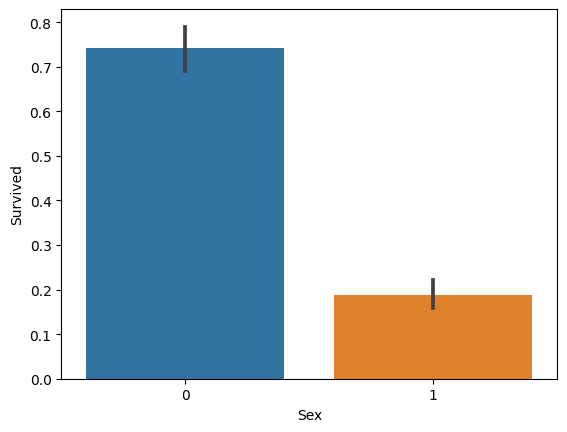

In [298]:
# What is the survival rate by sex in each Pclass?
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

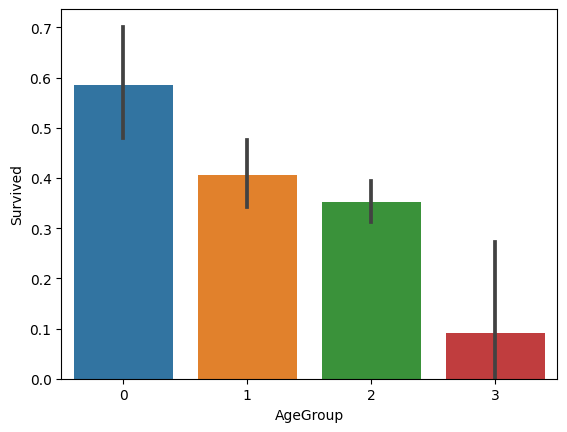

In [299]:
# What is the survival rate in each age group?
sns.barplot(x = 'AgeGroup', y = 'Survived', data = titanic_df)


The survival rate decreases with the increase in age. This relates survival with age.

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

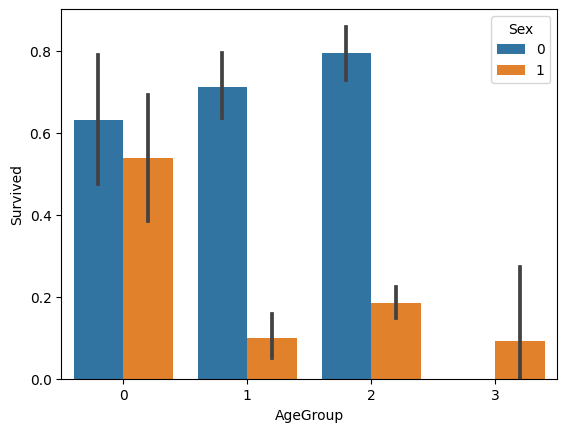

In [300]:
sns.barplot(x = 'AgeGroup', y = 'Survived', hue='Sex', data = titanic_df)

Women are more likely to survive than men in for age less than 64. This relates survival with age and sex.

<AxesSubplot:xlabel='FareScale', ylabel='Survived'>

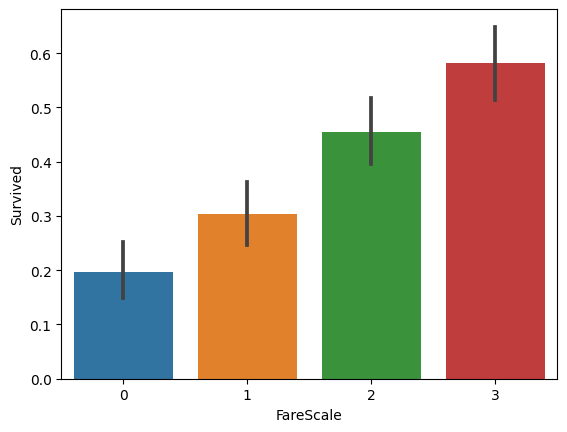

In [301]:
# How do survival rate differ by FareScale?
sns.barplot(x = 'FareScale', y = 'Survived', data = titanic_df)

More expensive fare means better better survival chance.

C:\Users\wjx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


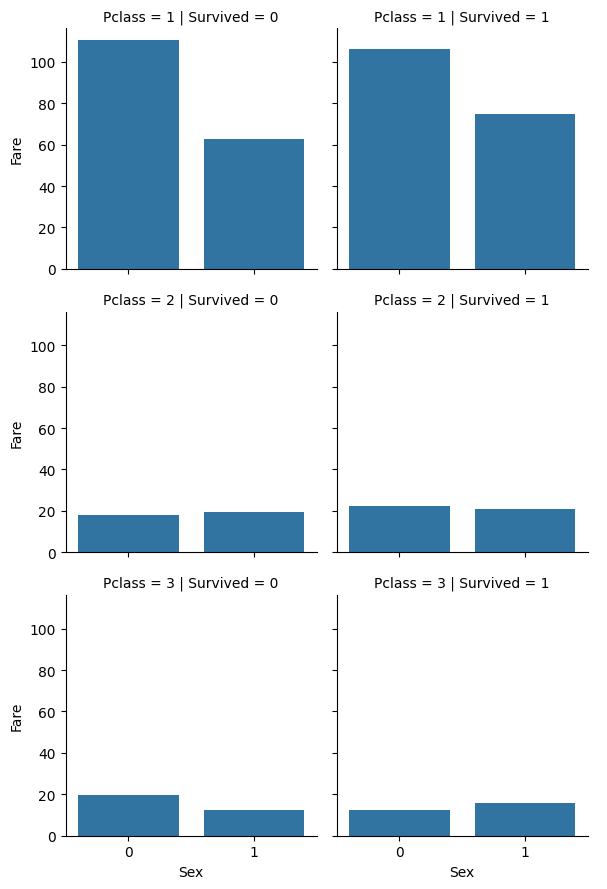

In [302]:
# Women have better survival chance, it is partly because their fare care higher than men?
# Facet by Survived, plot the count of fares of males and females over farescale
grid = sns.FacetGrid(titanic_df, col='Survived', row = 'Pclass')
grid.map(sns.barplot, 'Sex', 'Fare', ci = None)
grid.add_legend()

For Pclass == 3 and 2, female and male pay roughly the same fare in both survival groups. 
For Pclass == 1, female who survived pay significantly more than men. Spuriously, men in the first class who doesn't survive pay more than women.

<AxesSubplot:xlabel='Title_rank', ylabel='Survived'>

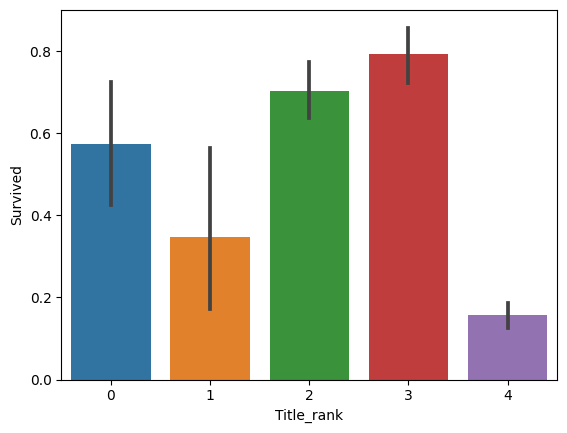

In [303]:
# What are the survival rates in each title rank?
sns.barplot(x = 'Title_rank', y = 'Survived', data = titanic_df)

Rank titles by survival rate: Mrs. > Miss. > Master. > Minority > Mr.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

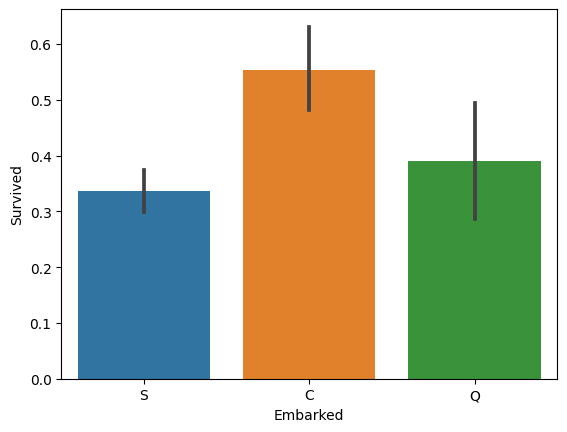

In [304]:
# Does embarkation have impact?
sns.barplot(x = 'Embarked', y = 'Survived', data = titanic_df) ## C > Q > S

Decisions:
* Encode C, Q, S by 0,1,2, respectively
* Recorder title rank as {0:1, 1:4, 2:1, 3:0, 5:4}

In [249]:
titanic_df.Embarked = titanic_df.Embarked.map({'C':0, 'Q':1, 'S':2})
titanic_df.Title_rank = titanic_df.Title_rank.map({3:0, 2:1, 0:2, 1:3, 4:4})

titanic_df = titanic_df.drop(['Fare'], axis = 1)


KeyError: "['Fare'] not found in axis"

Model, predict, and solve

In [246]:
## Training, test set split
y = titanic_df.Survived
X = titanic_df.loc[:, titanic_df.columns != 'Survived']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [248]:
## Fit a Logistic model on a subset of training data, leave a portion for validation
LR = LogisticRegression()
LR.fit(X, y)
LR_prediction = LR.predict(val_X)
score = mean_absolute_error(LR_prediction, val_y)
print('The correctly predicted percentage is:', round(score*100, 2), '%')

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [250]:
titanic_df.describe()

,Survived,Pclass,Sex,Embarked,AgeGroup,Title_rank,Fsize
count,891.000000,891.000000,891.000000,0.0,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,NaN,1.567901,3.271605,1.904602
std,0.486592,0.836071,0.477990,NaN,0.665896,1.030039,1.613459
min,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,NaN,1.000000,3.000000,1.000000
50%,0.000000,3.000000,1.000000,NaN,2.000000,4.000000,1.000000
75%,1.000000,3.000000,1.000000,NaN,2.000000,4.000000,2.000000
max,1.000000,3.000000,1.000000,NaN,3.000000,4.000000,11.000000


In [ ]:
X.FareScale.isnull().sum()

15